<a href="https://colab.research.google.com/github/ZeroAthena/SimMat02025/blob/main/Repaso_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso - Módulo 2

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

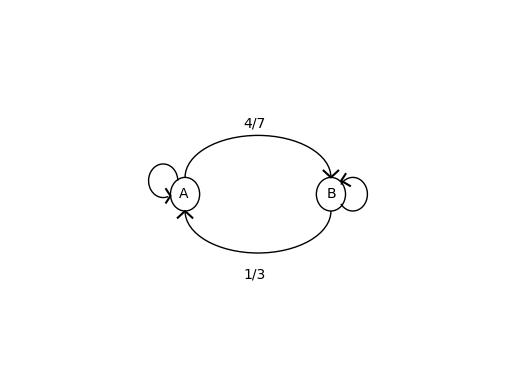

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

Suponiendo que…
\begin{eqnarray}
A=0\\
B=1\\
\end{eqnarray}

Asignamos valor y probabilidad a cada estado:

|Estado inicial|Estado final|Probabilidad|Suma|
|--------------|------------|------------|----|
|A|A|0.43|0|
|A|B|0.57|+1|
|B|B|0.67|0|
|B|A|0.33|-1|

In [2]:
import numpy as np

def maquina(estado0,operaciones):
  trans=[-1,0,1] #Los movimientos que puede dar el programa
  estado=estado0
  for i in range(operaciones):
    if estado==0:
      p=[0,0.43,0.57] #Las probabilidades deben tener el mismo tamaño que las transiciones y sus elementos deben sumar 1
    else:
      p=[0.33,0.67,0]
    estado+=np.random.choice(trans,p=p)
  return estado

B=0
for i in range(100000):
  B+=maquina(0,50)==1
B

np.int64(63536)

In [4]:
(B/100000)*100

np.float64(63.536)

#**Resultado:**

De $100,000$ escenarios, el $63.54\%$ de estos acabaron sus procesos en el estado B.

---
## Problema 2. Simulación de escenarios futuros

Evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2025 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2024 y muestre sus gráficas.

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipython-input-837786029.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start='2015-01-01',end='2024-12-31')['Close'] #Extraemos los precios ajustados al cierre de los últimos 10 años
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

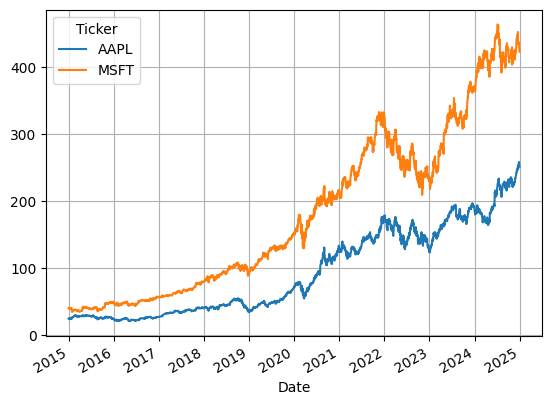

In [7]:
#Descargamos los tickers
ticker=['AAPL','MSFT']
data=yf.download(ticker,start='2015-01-01',end='2024-12-31')['Close'] #Extraemos los precios ajustados al cierre de los últimos 10 años
data.plot(grid=True)


Calcule los rendimientos diarios junto con sus características estadísticas

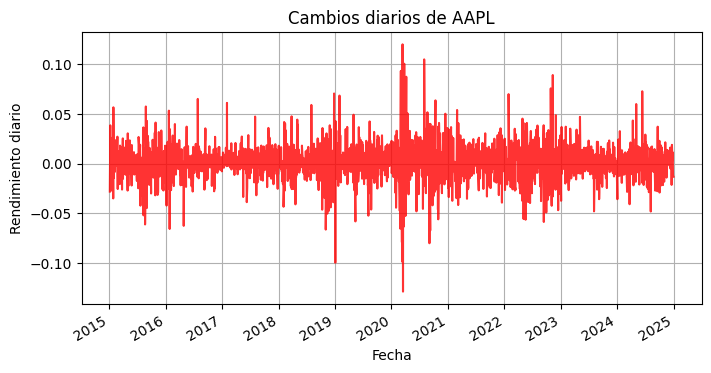

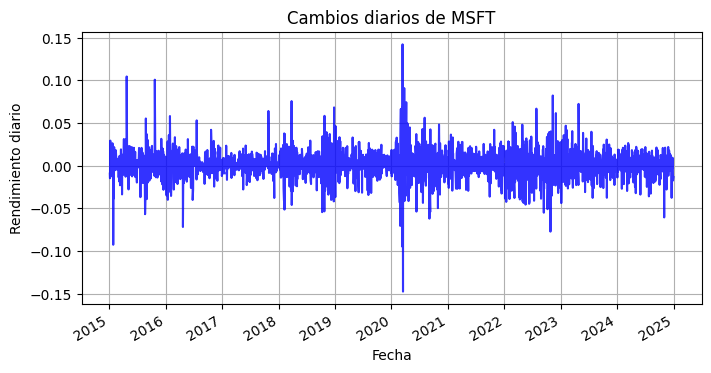

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'MSFT'}>]], dtype=object)

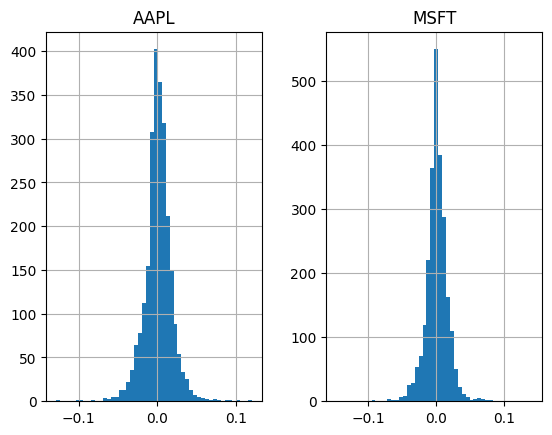

In [71]:
#Rendimiento diario
delta=data.pct_change().dropna() #Cambios del precio en cada día
colores=['red','blue']
for i in range(len(ticker)):
  plt.figure(figsize=(8,4))
  delta.iloc[:, i].plot(grid=True,c=colores[i],alpha=0.8)
  plt.title(f"Cambios diarios de {ticker[i]}")
  plt.xlabel("Fecha")
  plt.ylabel("Rendimiento diario")
  plt.show()
delta.hist(bins=50,grid=True)

In [72]:
#Media y desviación estandar de cada empresa
for i in ticker:
  print(f'{i}')
  print(f'Media:{delta[i].mean()}', f'Desviación estandar:{delta[i].std()}')

AAPL
Media:0.0010910964913203047 Desviación estandar:0.01793205365317609
MSFT
Media:0.0010848458794056155 Desviación estandar:0.017098447691465467


Simule 10000 escenarios de rendimientos diarios para todo el año 2025 (para cada una de las empresas).

In [99]:
#Simulamos los deltas
N_dias=365 #días en un año
N_escenarios=10000
rango_tiempo=pd.date_range('2025-01-01',periods=N_dias)
delta_empresas={}

for i in ticker:
  delta_empresas[i]=pd.DataFrame((np.random.normal(delta[i].mean(),delta[i].std(),(N_dias,N_escenarios))),rango_tiempo)

Calcule los precios con base en los rendimientos simulados

In [100]:
precios_empresas={}

for i in ticker:
  precios_empresas[i]=data[i].iloc[-1]*((delta_empresas[i]+1).cumprod())

,0,1,2,3,4
2025-01-01,256.333218,247.984046,259.331612,259.266705,252.418360
2025-01-02,255.760057,244.888415,256.958322,264.416664,255.970658


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

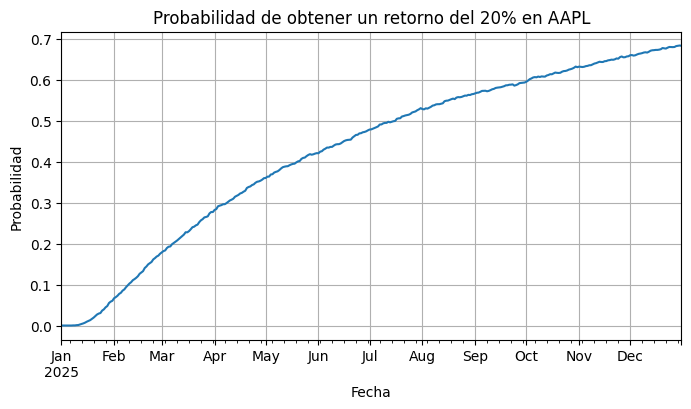

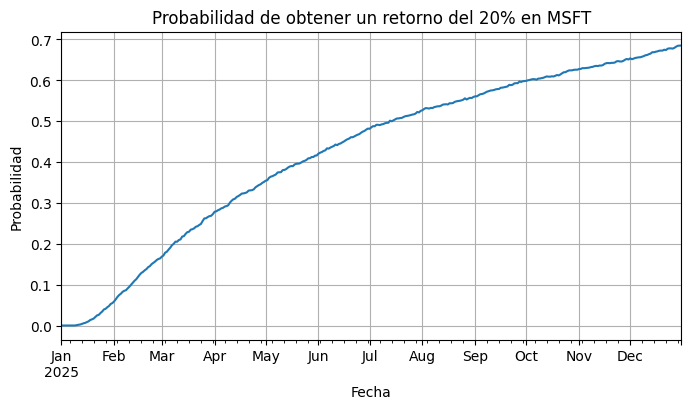

In [102]:
B={}
proba={}

for i in ticker:
  B[i]=precios_empresas[i]>data[i].iloc[-1]*1.2
  proba[i]=B[i].mean(axis=1)

for i in ticker:
  plt.figure(figsize=(8,4))
  proba[i].plot(grid=True)
  plt.title(f"Probabilidad de obtener un retorno del 20% en {i}")
  plt.xlabel("Fecha")
  plt.ylabel("Probabilidad")
  plt.show()

Finalmente, grafique los datos reales del 2025 para ver que tan acertado fue nuestro análisis.

/tmp/ipython-input-2370942907.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_real=yf.download(ticker,start='2025-01-01',end='2025-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


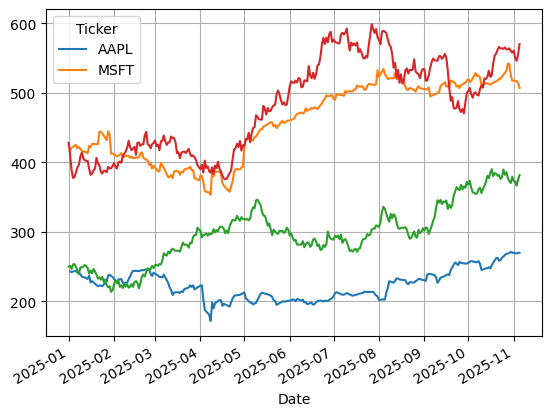

In [132]:
#Sacamos los datos reales
data_real=yf.download(ticker,start='2025-01-01',end='2025-12-31')['Close']
#Graficamos ambos data para comparar
data_real.plot(grid=True)
for i in ticker:
  precios_empresas[i].loc['2025-01-01':'2025-11-05'][np.random.randint(10000)].plot(grid=True)

#**Resultados:**

Se concluye que la simulación que generó $10,000$ escenarios es un tanto acertada, ya que la gráfica que compara los datos reales con los simulados demuestra un comportamiento similar para las acciones de *MSFT*, pero uno desviado para *AAPL*. No obstante esta desviación podrá corregirse en otro de los escenarios, por lo que este comportamiento puede ser despreciable.

Sólo un evento innesperado puede romper con la predicción